# 📂 Table of Content <br>
<hr>

####   [Project Overview](#project-overview)
####   [Questions of Interest](#questions-of-interest)
####   [Basic cleaning](#basic-cleaning)
####   [Basic filtering](#basic-filtering)
####   [Analysis](#analysis)
####   [Some remarks]( #some-remarks)
####   [Graphs](#graphs)
####   [Results](#results)

# 🧾 project-overview <br>
<hr>

### This project aims to analyze a dataset of Aircraft accidents and incidents records to determine in which aircraft to invest in. This dataset was downloaded from Kaggle 👉 [_dataset_ ](https://www.kaggle.com/datasets/khsamaha/aviation-accident-database-synopses) and consists of 88859 rows and 31 columns. 
    
### To ensure data quality and reliability, we began by cleaning the dataset; this involved removing irrelevant columns and rows, handling missing values, and identifying and excluding outliers that could skew our analysis.

### We conducted exploratory data analysis (EDA) using tools such as .head(), .value_counts(), and basic filtering techniques to better understand the structure and content of the data. We also used grouping and subsetting methods to uncover patterns and compare aircraft performance across different variables such as manufacturer, aircraft type, and year. Our final goal was to identify aircraft models that consistently showed low incident rates or minimal risk factors, based on multiple criteria derived from our analysis. These insights can help inform strategic decisions for stakeholders considering aircraft investments.




# ❓
#  questions-of-interest
<hr>

### Before running my analysis, I have selected a range of questions that spike my interest and could help me in finding the aircraft less risky for investment.


* What are the aircraft categories in the dataset? <br>
* How many accidents are there by aircraft? <br>
* How likely is it for a 1-engine aircraft to be accidented? <br>
* How likely is it for an aircraft to be destroyed in an accident? <br>
* What is the death rate by accident for each aircraft category? <br>

In [196]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [197]:
df = pd.read_csv("AviationData.csv",encoding = "ISO-8859-1",low_memory = False, parse_dates = ["Event.Date"],usecols = ["Investigation.Type","Accident.Number","Event.Date","Aircraft.damage","Aircraft.Category","Number.of.Engines","Engine.Type","Air.carrier","Total.Fatal.Injuries"])

In [198]:
df.head()

,Investigation.Type,Accident.Number,Event.Date,Aircraft.damage,Aircraft.Category,Number.of.Engines,Engine.Type,Air.carrier,Total.Fatal.Injuries
0,Accident,SEA87LA080,1948-10-24,Destroyed,NaN,1.0,Reciprocating,NaN,2.0
1,Accident,LAX94LA336,1962-07-19,Destroyed,NaN,1.0,Reciprocating,NaN,4.0
2,Accident,NYC07LA005,1974-08-30,Destroyed,NaN,1.0,Reciprocating,NaN,3.0
3,Accident,LAX96LA321,1977-06-19,Destroyed,NaN,1.0,Reciprocating,NaN,2.0
4,Accident,CHI79FA064,1979-08-02,Destroyed,NaN,NaN,NaN,NaN,1.0


## basic-cleaning


In [199]:
#cleaning part
df.drop_duplicates(inplace = True)
#df.isna().sum() to check how many null values are there in each column.
df.dropna(inplace = True)


## basic-filtering

In [200]:
df["Years"] = df["Event.Date"].dt.year
df.drop(columns = "Event.Date").head(5)

,Investigation.Type,Accident.Number,Aircraft.damage,Aircraft.Category,Number.of.Engines,Engine.Type,Air.carrier,Total.Fatal.Injuries,Years
22,Accident,ATL82DA027,Substantial,Helicopter,1.0,Turbo Shaft,"Rocky Mountain Helicopters, In",0.0,1982
33,Accident,LAX82FA038,Destroyed,Airplane,2.0,Reciprocating,Lang Air Service,2.0,1982
39,Accident,DCA82AA009,Destroyed,Airplane,2.0,Reciprocating,Empire Airlines,2.0,1982
43,Accident,LAX82DA037,Substantial,Airplane,1.0,Reciprocating,Joel Frederick's Monarch Air,0.0,1982
44,Accident,ANC82FA012,Substantial,Airplane,1.0,Reciprocating,Executive Charter Service,0.0,1982


In [201]:
TotalrecordsByAircraft = df["Aircraft.Category"].value_counts()
pd.DataFrame(TotalrecordsByAircraft)

# here the aircraft category values refer to how many times an aircraft has appeard in the records so the accidents +incidents reords


,Aircraft.Category
Airplane,8670
Helicopter,1514
Weight-Shift,60
Powered Parachute,36
Gyrocraft,34
Glider,28
Ultralight,6
Balloon,5
Rocket,1
Blimp,1


## analysis 

In [202]:
accidentsByAircraft = df[df["Investigation.Type"]=="Accident"].loc[:,["Investigation.Type","Aircraft.Category"]].groupby(["Aircraft.Category","Investigation.Type"]).agg(NumOfAcc = ("Investigation.Type", "count")).sort_values(by = ["NumOfAcc"],ascending = False)
accidentsByAircraft

#groupby the investigation type and aircraft category for accident records only

,,NumOfAcc
Aircraft.Category,Investigation.Type,
Airplane,Accident,8402
Helicopter,Accident,1479
Weight-Shift,Accident,60
Powered Parachute,Accident,36
Gyrocraft,Accident,34
Glider,Accident,28
Ultralight,Accident,6
Balloon,Accident,5
Blimp,Accident,1


## some-remarks
## 🧐

_On a subset of over 10355 records, 81.14% concerns airplane's accidents, 14.28% Helicopter's, 0.58% Weight-Shift's , 0.35 % Powered Parachute's , 3.3% Gyrocraft , and 0.27% Glider's. The others being irrelevant because of the small records they hold._


In [203]:
TypeAccidentCount = df[df["Investigation.Type"]=="Accident"].loc[:,["Aircraft.Category","Aircraft.damage"]].groupby(["Aircraft.Category","Aircraft.damage"]).agg(TypeOfAccCount = ("Aircraft.damage", "count")).sort_values(by = ["TypeOfAccCount"],ascending = False)
TypeAccidentCount

,,TypeOfAccCount
Aircraft.Category,Aircraft.damage,
Airplane,Substantial,7638
Helicopter,Substantial,1317
Airplane,Destroyed,696
Helicopter,Destroyed,158
Airplane,Minor,66
Weight-Shift,Substantial,56
Powered Parachute,Substantial,32
Gyrocraft,Substantial,31
Glider,Substantial,27


<hr>

   🔎 Airplane_Destroyed_Rate =   **8.28%** <br>

   🔎 Helicopter_Destroyed_Rate =  **10.68 %** ❓ <br> 

   🔎 Weight-Shift_Destroyed_Damage_Rate =  **5%** <br>
 
   🔎 Powered Parachute_Destroyed_Rate =  **8.34%** <br>

   🔎 Gyrocraft_Destroyed_Rate =  **8.82%** <br>
 
   🔎 Glider_Destroyed_Rate =   **3.57%** <br>

In [204]:
#total fatal injuries by aircraft category and number of engines
Injuries = df[df["Investigation.Type"]=="Accident"].loc[:,["Number.of.Engines","Aircraft.Category","Accident.Number"]].groupby(["Number.of.Engines","Aircraft.Category"]).agg(AccidentCount = ("Accident.Number", "count")).sort_values(by = ["AccidentCount"],ascending = False)
Injuries

AccidentCount
Number.of.Engines Aircraft.Category               
1.0               Airplane                    7176
                  Helicopter                  1370
2.0               Airplane                    1189
                  Helicopter                   109
1.0               Weight-Shift                  60
                  Powered Parachute             36
                  Gyrocraft                     34
                  Glider                        22
4.0               Airplane                      22
3.0               Airplane                      13
1.0               Ultralight                     5
0.0               Glider                         5
1.0               Balloon                        3
8.0               Airplane                       1
2.0               Ultralight                     1
0.0               Airplane                       1
2.0               Glider                         1
                  Balloon                        1
1.0               Rocket                         1
                  Blimp                          1
8.0               Balloon                        1

📍_On the 8402 Airplane accidents_ , most of them are from 1-Engine planes, and we can see(👀) that **0-Engine** and **8-Engine** **Airplane** <br>   only caused **1 accident each !** <br>

📌  We can Also see that across all the Aircrafts, **1-Engine type is the worst leading either most accidents or All 😦!**


In [205]:
TotalFatalinjuries = df[df["Investigation.Type"]=="Accident"].loc[:,["Aircraft.Category","Total.Fatal.Injuries"]].groupby(["Aircraft.Category"]).agg(TotalFatalInjuries = ("Total.Fatal.Injuries", "sum")).sort_values(by = ["TotalFatalInjuries"],ascending = False)
TotalFatalinjuries

,TotalFatalInjuries
Aircraft.Category,
Airplane,3137.0
Helicopter,578.0
Weight-Shift,28.0
Gyrocraft,9.0
Powered Parachute,6.0
Glider,4.0
Ultralight,2.0
Rocket,1.0
Balloon,0.0


In [206]:
TotalFatalinjuries["TotalFatalInjuries"].sum() == df["Total.Fatal.Injuries"].sum()
#This verifies that the sum of Injuries partitioned by each Aircraft adds up to all the ungrouped Injuries  in The original Table.

True

                                      

                            📉-Death_rate_by_accident = (Total.Fatal.Injuries/Total Accidents) 
              
   # ☠️         
 
 * Airplane_Death_Rate_by_Accident = 37.34% <br>

 * Helicopter_Death_Rate_by_Accident = 39 % <br>

 * Weight-Shift_Death_Rate_by_Accident = 46.67% ❓ <br>

 * Powered Parachute_Death_Rate_by_Accident = 25% <br>

 * Gyrocraft_Death_Rate_by_Accident = 17% <br>

 * Glider_Death_Rate_by_Accident = 14.28% <br>

## graphs

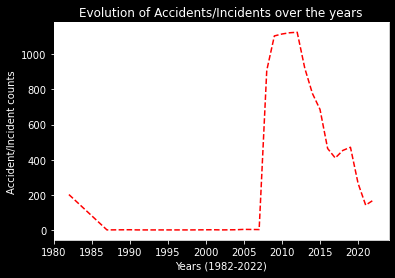

In [207]:
done = df[["Years","Investigation.Type"]].groupby(["Years"]).count()
y = done["Investigation.Type"]
fig,ax =plt.subplots()
ax.plot(y, linestyle = "--", color = "r")
ax.set_title("Evolution of Accidents/Incidents over the years")
ax.set_ylabel("Accident/Incident counts")
ax.set_xlabel("Years (1982-2022)")
ax.set_facecolor("w")




# This gives a quick overview of the evolution of aircrafts failures (Accidents/incidents) over the years...

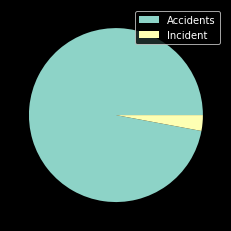

In [208]:

fig, ax =  plt.subplots()
ax.pie(df["Investigation.Type"].value_counts())
colors =[ "Accidents","Incident"]
plt.legend(colors)
plt.show()

#This shows the proportion of accidents against incidents of the aircrafts

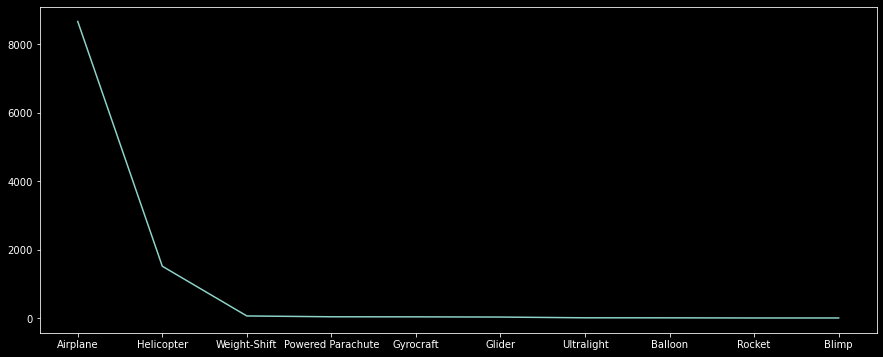

In [209]:
fig, axs = plt.subplots(figsize = (15,6))
axs.plot(df["Aircraft.Category"].value_counts())  # Thid graph shows the number of accidents by Aircraft trend

# results

I would suggest the company to start insvestment in Glider because it has proven to be the less risky throughout our Analsis.
If we consider that each aircraft should have at least 25 records to be considered in the analysis, Glider holds the minimum number on (accidents + incidents) in our 10355 subset. Then Glider destroyed rate on an accident is 3.57% which is very low compared to the others, that means that if a Glider were the make an accident , the probability of the aircraft to be desroyed is 3.57%. Moreover, the sum of all fatal injuries caused by Gliders is the subset is only 4 ,; leaving us with a desth rate of 14.28% , the lowest.

Howerver one recommendation i would make to the busines is to avoid 1-engine gliders which account for 22 accidents over the 28 records, the company should invest in 2-engines gliders which have only caused one accident over the 28 recorded !

The business should also consider diversifying its portfolio of aircrafts in the future by going for its next best option : Gyrocraft.

In [211]:
df.to_excel('cleaned_data.xlsx', index=False)